In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [2]:
secrets_file = open("spotifycd.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
string

'cid:17419e6ff4a54f59a40b3bfabcc42519\ncs:f54630bfdef747a4bdcfc5aeeee24108'

In [5]:
string.split('\n')

['cid:17419e6ff4a54f59a40b3bfabcc42519', 'cs:f54630bfdef747a4bdcfc5aeeee24108']

In [6]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [7]:
secrets_dict

{'cid': '17419e6ff4a54f59a40b3bfabcc42519',
 'cs': 'f54630bfdef747a4bdcfc5aeeee24108'}

In [8]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [9]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['cs']))

In [10]:
playlist = sp.user_playlist_tracks("spotify", "6yPiKpy7evrwvZodByKvM9")

In [11]:
playlist

{'href': 'https://api.spotify.com/v1/playlists/6yPiKpy7evrwvZodByKvM9/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2017-02-27T01:38:09Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/12160726861'},
    'href': 'https://api.spotify.com/v1/users/12160726861',
    'id': '12160726861',
    'type': 'user',
    'uri': 'spotify:user:12160726861'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50Lr1puweM1hFsF1LpIZLM'},
       'href': 'https://api.spotify.com/v1/artists/50Lr1puweM1hFsF1LpIZLM',
       'id': '50Lr1puweM1hFsF1LpIZLM',
       'name': 'WhoMadeWho',
       'type': 'artist',
       'uri': 'spotify:artist:50Lr1puweM1hFsF1LpIZLM'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/1cS5EoXVqz7aON00AkVBBA'},
       'href': 'https://api.spotify.com/v1/artists/1cS5EoXVqz7aON00AkVBBA',

In [12]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [13]:
playlist["items"][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [14]:
playlist["items"][0]["track"]

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50Lr1puweM1hFsF1LpIZLM'},
    'href': 'https://api.spotify.com/v1/artists/50Lr1puweM1hFsF1LpIZLM',
    'id': '50Lr1puweM1hFsF1LpIZLM',
    'name': 'WhoMadeWho',
    'type': 'artist',
    'uri': 'spotify:artist:50Lr1puweM1hFsF1LpIZLM'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/1cS5EoXVqz7aON00AkVBBA'},
    'href': 'https://api.spotify.com/v1/artists/1cS5EoXVqz7aON00AkVBBA',
    'id': '1cS5EoXVqz7aON00AkVBBA',
    'name': 'DAVID AUGUST',
    'type': 'artist',
    'uri': 'spotify:artist:1cS5EoXVqz7aON00AkVBBA'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/2GvwZbDjH1DbQpodGKENDw'},
    'href': 'https://api.spotify.com/v1/artists/2GvwZbDjH1DbQpodGKENDw',
    'id': '2GvwZbDjH1DbQpodGKENDw',
    'name': 'Roman Flügel',
    'type': 'artist',
    'uri': 'spotify:artist:2GvwZbDjH1DbQpodGKENDw'}],
  'available_markets': [],
  'external_urls'

In [15]:
playlist["items"][0]["track"]["name"]

'2K'

In [16]:
playlist["total"]

10000

In [17]:
len(playlist["items"])

100

In [18]:
def get_name_artists_from_track(track):
    return [(track["name"],artist["name"]) for artist in track["artists"]]

In [19]:
def get_name_artist_from_playlist_item(playlist_item):
    return get_name_artists_from_track(playlist_item['track'])

In [20]:
get_name_artist_from_playlist_item(playlist["items"][0])

[('2K', 'Nosaj Thing')]

In [21]:
def get_name_artists_from_playlist(input_playlist):
    return list(map(get_name_artist_from_playlist_item,input_playlist["items"]))

In [22]:
get_name_artists_from_playlist(playlist)

[[('2K', 'Nosaj Thing')],
 [('4 Billion Souls', 'The Doors')],
 [('4 Minute Warning', 'Radiohead')],
 [('7 Element', 'Vitas')],
 [('#9 Dream', 'R.E.M.')],
 [('#9 Dream', 'a-ha')],
 [('10 Lovers', 'The Black Keys')],
 [('11th Dimension', 'Julian Casablancas')],
 [('12:51', 'The Strokes')],
 [('12:51', 'The Strokes')],
 [('12 Bar Original - Anthology 2 Version', 'The Beatles')],
 [('15 Minutes', 'The Strokes')],
 [('15 Step', 'Radiohead')],
 [('17', 'Perfume Genius')],
 [('21 Gun Salute', 'Half Moon Run')],
 [('22h22', 'Ariane Moffatt')],
 [('28 Jours', 'Karkwa')],
 [('39', 'Vinnie Who')],
 [('50/50', 'The Strokes')],
 [('50 Shades of Beige', 'Radio Radio')],
 [("80's Comedown Machine", 'The Strokes')],
 [('96.7 The Pipe', 'Mac DeMarco')],
 [('100 Amazing Bass Lines', '')],
 [('106.2 Breeze FM', 'Mac DeMarco')],
 [("143 (Kelly's song) 2011", 'Jake Shimabukuro')],
 [('400 Lux', 'Lorde')],
 [('1517', 'The Whitest Boy Alive')],
 [('1990 (Danse Mix)', 'Jean Leloup')],
 [('2024', 'Cage The El

In [23]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [24]:
def get_name_artists_from_playlist(input_playlist):
    return flatten(list(map(get_name_artist_from_playlist_item,input_playlist["items"])))

In [25]:
get_name_artists_from_playlist(playlist)

[('2K', 'Nosaj Thing'),
 ('4 Billion Souls', 'The Doors'),
 ('4 Minute Warning', 'Radiohead'),
 ('7 Element', 'Vitas'),
 ('#9 Dream', 'R.E.M.'),
 ('#9 Dream', 'a-ha'),
 ('10 Lovers', 'The Black Keys'),
 ('11th Dimension', 'Julian Casablancas'),
 ('12:51', 'The Strokes'),
 ('12:51', 'The Strokes'),
 ('12 Bar Original - Anthology 2 Version', 'The Beatles'),
 ('15 Minutes', 'The Strokes'),
 ('15 Step', 'Radiohead'),
 ('17', 'Perfume Genius'),
 ('21 Gun Salute', 'Half Moon Run'),
 ('22h22', 'Ariane Moffatt'),
 ('28 Jours', 'Karkwa'),
 ('39', 'Vinnie Who'),
 ('50/50', 'The Strokes'),
 ('50 Shades of Beige', 'Radio Radio'),
 ("80's Comedown Machine", 'The Strokes'),
 ('96.7 The Pipe', 'Mac DeMarco'),
 ('100 Amazing Bass Lines', ''),
 ('106.2 Breeze FM', 'Mac DeMarco'),
 ("143 (Kelly's song) 2011", 'Jake Shimabukuro'),
 ('400 Lux', 'Lorde'),
 ('1517', 'The Whitest Boy Alive'),
 ('1990 (Danse Mix)', 'Jean Leloup'),
 ('2024', 'Cage The Elephant'),
 ('A-Punk', 'Vampire Weekend'),
 ('The Abductio

In [26]:
playlist['next']

'https://api.spotify.com/v1/playlists/6yPiKpy7evrwvZodByKvM9/tracks?offset=100&limit=100&additional_types=track'

In [27]:
sp.next(playlist)

{'href': 'https://api.spotify.com/v1/playlists/6yPiKpy7evrwvZodByKvM9/tracks?offset=100&limit=100&additional_types=track',
 'items': [{'added_at': '2017-02-27T01:38:09Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/12160726861'},
    'href': 'https://api.spotify.com/v1/users/12160726861',
    'id': '12160726861',
    'type': 'user',
    'uri': 'spotify:user:12160726861'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0bzfPKdbXL5ezYW2z3UGQj'},
       'href': 'https://api.spotify.com/v1/artists/0bzfPKdbXL5ezYW2z3UGQj',
       'id': '0bzfPKdbXL5ezYW2z3UGQj',
       'name': 'Michael Kiwanuka',
       'type': 'artist',
       'uri': 'spotify:artist:0bzfPKdbXL5ezYW2z3UGQj'}],
     'available_markets': ['CA'],
     'external_urls': {'spotify': 'https://open.spotify.com/album/5CIX8peIhEeOngVuRrz8Yw'},
     'href': 'https://api.spotify.c

In [28]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [29]:
all_tracks = get_playlist_tracks("6yPiKpy7evrwvZodByKvM9")
all_tracks

[{'added_at': '2017-02-27T01:38:09Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/12160726861'},
   'href': 'https://api.spotify.com/v1/users/12160726861',
   'id': '12160726861',
   'type': 'user',
   'uri': 'spotify:user:12160726861'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50Lr1puweM1hFsF1LpIZLM'},
      'href': 'https://api.spotify.com/v1/artists/50Lr1puweM1hFsF1LpIZLM',
      'id': '50Lr1puweM1hFsF1LpIZLM',
      'name': 'WhoMadeWho',
      'type': 'artist',
      'uri': 'spotify:artist:50Lr1puweM1hFsF1LpIZLM'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/1cS5EoXVqz7aON00AkVBBA'},
      'href': 'https://api.spotify.com/v1/artists/1cS5EoXVqz7aON00AkVBBA',
      'id': '1cS5EoXVqz7aON00AkVBBA',
      'name': 'DAVID AUGUST',
      'type': 'artist',
      'uri': 'spotify:artist:1cS5EoXVqz7aON00AkVBBA'},

In [30]:
all_tracks[0]

{'added_at': '2017-02-27T01:38:09Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/12160726861'},
  'href': 'https://api.spotify.com/v1/users/12160726861',
  'id': '12160726861',
  'type': 'user',
  'uri': 'spotify:user:12160726861'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50Lr1puweM1hFsF1LpIZLM'},
     'href': 'https://api.spotify.com/v1/artists/50Lr1puweM1hFsF1LpIZLM',
     'id': '50Lr1puweM1hFsF1LpIZLM',
     'name': 'WhoMadeWho',
     'type': 'artist',
     'uri': 'spotify:artist:50Lr1puweM1hFsF1LpIZLM'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/1cS5EoXVqz7aON00AkVBBA'},
     'href': 'https://api.spotify.com/v1/artists/1cS5EoXVqz7aON00AkVBBA',
     'id': '1cS5EoXVqz7aON00AkVBBA',
     'name': 'DAVID AUGUST',
     'type': 'artist',
     'uri': 'spotify:artist:1cS5EoXVqz7aON00AkVBBA'},
    {'external_urls'

In [31]:
all_tracks[15]["track"]["name"]

'22h22'

In [32]:
all_tracks[60]["track"]["name"]

'All About Us'

In [33]:
song_uri = all_tracks[15]["track"]["uri"]
song_uri

'spotify:track:7BIPYQPHbPVDE9UsA0eT72'

In [34]:
sp.audio_features(song_uri)

[{'danceability': 0.35,
  'energy': 0.0959,
  'key': 10,
  'loudness': -17.471,
  'mode': 1,
  'speechiness': 0.0439,
  'acousticness': 0.964,
  'instrumentalness': 0.0024,
  'liveness': 0.106,
  'valence': 0.108,
  'tempo': 143.861,
  'type': 'audio_features',
  'id': '7BIPYQPHbPVDE9UsA0eT72',
  'uri': 'spotify:track:7BIPYQPHbPVDE9UsA0eT72',
  'track_href': 'https://api.spotify.com/v1/tracks/7BIPYQPHbPVDE9UsA0eT72',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7BIPYQPHbPVDE9UsA0eT72',
  'duration_ms': 200907,
  'time_signature': 4}]

In [35]:
song_uri = all_tracks[60]["track"]["uri"]
song_uri

'spotify:track:22ZIa4vKhUFzb4YZqp7g94'

In [36]:
sp.audio_features(song_uri)

[{'danceability': 0.729,
  'energy': 0.767,
  'key': 3,
  'loudness': -6.809,
  'mode': 0,
  'speechiness': 0.0621,
  'acousticness': 0.121,
  'instrumentalness': 0.0294,
  'liveness': 0.0839,
  'valence': 0.748,
  'tempo': 119.965,
  'type': 'audio_features',
  'id': '22ZIa4vKhUFzb4YZqp7g94',
  'uri': 'spotify:track:22ZIa4vKhUFzb4YZqp7g94',
  'track_href': 'https://api.spotify.com/v1/tracks/22ZIa4vKhUFzb4YZqp7g94',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/22ZIa4vKhUFzb4YZqp7g94',
  'duration_ms': 240360,
  'time_signature': 4}]

In [37]:
playlist_features_list = ["artist", "songs", "track_id", 
                             "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

In [38]:
playlist_df = pd.DataFrame(columns = playlist_features_list)

In [39]:
playlist_features = {}

In [40]:
songs = [all_tracks[i]['track']['name'] for i in range(len(all_tracks))]
songs 

['2K',
 '4 Billion Souls',
 '4 Minute Warning',
 '7 Element',
 '#9 Dream',
 '#9 Dream',
 '10 Lovers',
 '11th Dimension',
 '12:51',
 '12:51',
 '12 Bar Original - Anthology 2 Version',
 '15 Minutes',
 '15 Step',
 '17',
 '21 Gun Salute',
 '22h22',
 '28 Jours',
 '39',
 '50/50',
 '50 Shades of Beige',
 "80's Comedown Machine",
 '96.7 The Pipe',
 '100 Amazing Bass Lines',
 '106.2 Breeze FM',
 "143 (Kelly's song) 2011",
 '400 Lux',
 '1517',
 '1990 (Danse Mix)',
 '2024',
 'A-Punk',
 'The Abduction',
 'Aberdeen',
 'Above You',
 'Abraham',
 'Across The Universe - Take 2 / Anthology 2 Version',
 'Across The Universe - World Wildlife Fund Version / Remastered 2009',
 'Across The Universe - Remastered 2009',
 'Across The Universe - Remastered 2009',
 'Act Naturally - Remastered 2009',
 'Ad Lib Blues',
 'Addicted',
 'Adult Diversion',
 'Adventures in Your Own Backyard',
 'Aerodynamic',
 'Afraid of Time',
 'Afterlife',
 'Ah Holy Jesus',
 'Ah Holy Jesus (a capella)',
 'Ah Holy Jesus (with reed organ)'

In [41]:
len(songs)

10000

In [42]:
artists = [all_tracks[i]['track']['artists'][0]['name']for i in range(len(all_tracks))]
artists

['Nosaj Thing',
 'The Doors',
 'Radiohead',
 'Vitas',
 'R.E.M.',
 'a-ha',
 'The Black Keys',
 'Julian Casablancas',
 'The Strokes',
 'The Strokes',
 'The Beatles',
 'The Strokes',
 'Radiohead',
 'Perfume Genius',
 'Half Moon Run',
 'Ariane Moffatt',
 'Karkwa',
 'Vinnie Who',
 'The Strokes',
 'Radio Radio',
 'The Strokes',
 'Mac DeMarco',
 '',
 'Mac DeMarco',
 'Jake Shimabukuro',
 'Lorde',
 'The Whitest Boy Alive',
 'Jean Leloup',
 'Cage The Elephant',
 'Vampire Weekend',
 'John Williams',
 'Cage The Elephant',
 'The Whitest Boy Alive',
 'Sufjan Stevens',
 'The Beatles',
 'The Beatles',
 'The Beatles',
 'The Beatles',
 'The Beatles',
 'Lester Young',
 'Amy Winehouse',
 'Alvvays',
 'Patrick Watson',
 'Daft Punk',
 'Hans Zimmer',
 'Arcade Fire',
 'Sufjan Stevens',
 'Sufjan Stevens',
 'Sufjan Stevens',
 'Cage The Elephant',
 'The Beatles',
 'The Beatles',
 'Radiohead',
 '',
 'Karkwa',
 'Karkwa',
 'Jean Leloup',
 'Fleece',
 'Daft Punk',
 'Daft Punk',
 'Brazilian Girls',
 'Humble Braggers',


In [43]:
track_id = [all_tracks[i]['track']['id']for i in range(len(all_tracks))]
track_id

['33xMbeHzmWd6Od0BmLZEUs',
 '3UnyplmZaq547hwsfOR5yy',
 '1w8QCSDH4QobcQeT4uMKLm',
 '7J9mBHG4J2eIfDAv5BehKA',
 '1VZedwJj1gyi88WFRhfThb',
 '3DSmOF7ETJHAQEqqgoSJao',
 '5HPnumlogzZtpLEaORZjz1',
 '6i99ThziImjuFABb8rUQvy',
 '0nkLI0pdyTRpq7BsTFBufZ',
 '6Yu1OL8I0D4vjOzYdsXYGK',
 '2HvTGx5fzFGpHSyRNvXd9T',
 '2XS4lIQ1bl9KSNsYtkqK46',
 '6dsq7Nt5mIFzvm5kIYNORy',
 '1wKGGfnznnXIvupuEZt9mM',
 '7Jjqx75QRHaYsxF5WnHovC',
 '7BIPYQPHbPVDE9UsA0eT72',
 '4KEw5m7CZXVbpWbHVK4OrV',
 '2YTRLoG5jdzCp4yg3B6OnH',
 '5MPryR3oJGmWnSYM7X2GGE',
 '4ymUtICOpIlyvFf3URM7XZ',
 '2lffRiAET2Xt6BNb4EmkS2',
 '3oQ52Mqz2ih8KjligVoQrG',
 None,
 '5h8G81Ls00kyf1UEen0gBB',
 '6Tq4LginUMBOgZrUs8M40h',
 '7ynvnjTj1XI8ByUq3F8MUw',
 '4wHh4AljzbSGMJvynLgK1q',
 '2UFEbNhbk9GsxCigXPq3XI',
 '7IcXkPWjwqUCCkI2mUf02h',
 '1595LW73XBxkRk2ciQOHfr',
 '2vEkF5UazjaBL6CpG2BZgq',
 '6GWS0Nb3ybf3tQXZ0FlfZf',
 '5FcjGGKpQx6dvuGcbAcFtC',
 '4YpfqCRwb3ttShlTNaB2jU',
 '00fyPXxe2SCBHnFwEO9Eh1',
 '691jw4auDZjaTOwUJmtoSy',
 '4dkoqJrP0L8FXftrMZongF',
 '2Yh0H2OXI2UItG9GGfQ

In [44]:
track_uri = [all_tracks[i]['track']['uri']for i in range(len(all_tracks))]
track_uri

['spotify:track:33xMbeHzmWd6Od0BmLZEUs',
 'spotify:track:3UnyplmZaq547hwsfOR5yy',
 'spotify:track:1w8QCSDH4QobcQeT4uMKLm',
 'spotify:track:7J9mBHG4J2eIfDAv5BehKA',
 'spotify:track:1VZedwJj1gyi88WFRhfThb',
 'spotify:track:3DSmOF7ETJHAQEqqgoSJao',
 'spotify:track:5HPnumlogzZtpLEaORZjz1',
 'spotify:track:6i99ThziImjuFABb8rUQvy',
 'spotify:track:0nkLI0pdyTRpq7BsTFBufZ',
 'spotify:track:6Yu1OL8I0D4vjOzYdsXYGK',
 'spotify:track:2HvTGx5fzFGpHSyRNvXd9T',
 'spotify:track:2XS4lIQ1bl9KSNsYtkqK46',
 'spotify:track:6dsq7Nt5mIFzvm5kIYNORy',
 'spotify:track:1wKGGfnznnXIvupuEZt9mM',
 'spotify:track:7Jjqx75QRHaYsxF5WnHovC',
 'spotify:track:7BIPYQPHbPVDE9UsA0eT72',
 'spotify:track:4KEw5m7CZXVbpWbHVK4OrV',
 'spotify:track:2YTRLoG5jdzCp4yg3B6OnH',
 'spotify:track:5MPryR3oJGmWnSYM7X2GGE',
 'spotify:track:4ymUtICOpIlyvFf3URM7XZ',
 'spotify:track:2lffRiAET2Xt6BNb4EmkS2',
 'spotify:track:3oQ52Mqz2ih8KjligVoQrG',
 'spotify:local:::100+Amazing+Bass+Lines:785',
 'spotify:track:5h8G81Ls00kyf1UEen0gBB',
 'spotify:

In [45]:
playlist_features_list = ["artist", "songs", "track_id", 
                             "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

In [46]:
playlist_df = pd.DataFrame(columns = playlist_features_list)

In [47]:
playlist_df['artist'] = artists
playlist_df['songs'] = songs
playlist_df['track_id'] = track_id

In [48]:
playlist_df.head()

artist             songs                track_id danceability energy  \
0  Nosaj Thing                2K  33xMbeHzmWd6Od0BmLZEUs          NaN    NaN   
1    The Doors   4 Billion Souls  3UnyplmZaq547hwsfOR5yy          NaN    NaN   
2    Radiohead  4 Minute Warning  1w8QCSDH4QobcQeT4uMKLm          NaN    NaN   
3        Vitas         7 Element  7J9mBHG4J2eIfDAv5BehKA          NaN    NaN   
4       R.E.M.          #9 Dream  1VZedwJj1gyi88WFRhfThb          NaN    NaN   

   key loudness mode speechiness instrumentalness liveness valence tempo  \
0  NaN      NaN  NaN         NaN              NaN      NaN     NaN   NaN   
1  NaN      NaN  NaN         NaN              NaN      NaN     NaN   NaN   
2  NaN      NaN  NaN         NaN              NaN      NaN     NaN   NaN   
3  NaN      NaN  NaN         NaN              NaN      NaN     NaN   NaN   
4  NaN      NaN  NaN         NaN              NaN      NaN     NaN   NaN   

  duration_ms time_signature  
0         NaN            NaN  
1         NaN            NaN  
2         NaN            NaN  
3         NaN            NaN  
4         NaN            NaN

In [111]:
song_list = playlist_df[['artist', 'songs', 'track_id']]

In [112]:
song_list.head()

artist             songs                track_id
0  Nosaj Thing                2K  33xMbeHzmWd6Od0BmLZEUs
1    The Doors   4 Billion Souls  3UnyplmZaq547hwsfOR5yy
2    Radiohead  4 Minute Warning  1w8QCSDH4QobcQeT4uMKLm
3        Vitas         7 Element  7J9mBHG4J2eIfDAv5BehKA
4       R.E.M.          #9 Dream  1VZedwJj1gyi88WFRhfThb

In [49]:
song_features = [sp.audio_features(i) for i in track_uri]

Expected id of type track but found type 100+Amazing+Bass+Lines spotify:local:::100+Amazing+Bass+Lines:785
Expected id of type track but found type Alabama+Shakes+performing+Don%27t+Wanna+Fight+Live+on+KCRW spotify:local:::Alabama+Shakes+performing+Don%27t+Wanna+Fight+Live+on+KCRW:251
Expected id of type track but found type Anderson+East+-+Satisfy+Me+-+3_15_2015+-+Riverview+Bungalow%2C+Austin%2C+TX spotify:local:::Anderson+East+-+Satisfy+Me+-+3_15_2015+-+Riverview+Bungalow%2C+Austin%2C+TX:164
Expected id of type track but found type Art+Of+Sleeping+cover+Drake+%27Hotline+Bling%27+for+Like+A+Version spotify:local:::Art+Of+Sleeping+cover+Drake+%27Hotline+Bling%27+for+Like+A+Version:281
Expected id of type track but found type Bahamas+-+Stronger+Than+That+%28Buzzsession%29 spotify:local:::Bahamas+-+Stronger+Than+That+%28Buzzsession%29:172
Expected id of type track but found type CHANSON+_+RE%CC%81PLIQUES+DE+FILMS+%28AVEC+MIRO+BELZIL%29 spotify:local:::CHANSON+_+RE%CC%81PLIQUES+DE+FILMS+%

Expected id of type track but found type Who+Made+Who+-+Space+For+Rent spotify:local:::Who+Made+Who+-+Space+For+Rent:360
Expected id of type track but found type Xavier+Cafeine+-+Gise%CC%80le spotify:local:::Xavier+Cafeine+-+Gise%CC%80le:261
Expected id of type track but found type Xavier+Cafe%CC%81ine+-+La+fin+du+monde spotify:local:::Xavier+Cafe%CC%81ine+-+La+fin+du+monde:292
Expected id of type track but found type Xavier+Cafeine+-+Montreal+%28Cette+ville%29 spotify:local:::Xavier+Cafeine+-+Montreal+%28Cette+ville%29:305
Expected id of type track but found type Wii+Shop+Channel+Music spotify:local:::Wii+Shop+Channel+Music:559
Expected id of type track but found type All+You+Need+Is+Love spotify:local:The+Beatles:1967-1970+%5BDisc+1%5D:All+You+Need+Is+Love:228
Expected id of type track but found type Gathering+All+the+Lost+Loves spotify:local:General+Elektriks:Good+City+for+Dreamers:Gathering+All+the+Lost+Loves:168
Expected id of type track but found type Love+You+To spotify:local:Th

In [113]:
song_list['features'] = song_features

<ipython-input-113-6444c0125ef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_list['features'] = song_features


In [114]:
song_list.head()

artist             songs                track_id  \
0  Nosaj Thing                2K  33xMbeHzmWd6Od0BmLZEUs   
1    The Doors   4 Billion Souls  3UnyplmZaq547hwsfOR5yy   
2    Radiohead  4 Minute Warning  1w8QCSDH4QobcQeT4uMKLm   
3        Vitas         7 Element  7J9mBHG4J2eIfDAv5BehKA   
4       R.E.M.          #9 Dream  1VZedwJj1gyi88WFRhfThb   

                                            features  
0  [{'danceability': 0.31, 'energy': 0.445, 'key'...  
1  [{'danceability': 0.419, 'energy': 0.565, 'key...  
2  [{'danceability': 0.354, 'energy': 0.302, 'key...  
3  [{'danceability': 0.727, 'energy': 0.785, 'key...  
4  [{'danceability': 0.571, 'energy': 0.724, 'key...

In [115]:
song_list.isna().sum()

artist       0
songs        0
track_id    82
features     0
dtype: int64

In [132]:
type(song_list['features'])

pandas.core.series.Series

In [116]:
song_list = song_list.dropna()

In [117]:
len(song_list)

9918

In [50]:
len(song_features)

10000

In [51]:
song_features

[[{'danceability': 0.31,
   'energy': 0.445,
   'key': 7,
   'loudness': -13.355,
   'mode': 0,
   'speechiness': 0.0863,
   'acousticness': 0.094,
   'instrumentalness': 0.0678,
   'liveness': 0.113,
   'valence': 0.122,
   'tempo': 95.36,
   'type': 'audio_features',
   'id': '33xMbeHzmWd6Od0BmLZEUs',
   'uri': 'spotify:track:33xMbeHzmWd6Od0BmLZEUs',
   'track_href': 'https://api.spotify.com/v1/tracks/33xMbeHzmWd6Od0BmLZEUs',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/33xMbeHzmWd6Od0BmLZEUs',
   'duration_ms': 152560,
   'time_signature': 3}],
 [{'danceability': 0.419,
   'energy': 0.565,
   'key': 5,
   'loudness': -11.565,
   'mode': 1,
   'speechiness': 0.0347,
   'acousticness': 0.137,
   'instrumentalness': 0.337,
   'liveness': 0.128,
   'valence': 0.648,
   'tempo': 151.277,
   'type': 'audio_features',
   'id': '3UnyplmZaq547hwsfOR5yy',
   'uri': 'spotify:track:3UnyplmZaq547hwsfOR5yy',
   'track_href': 'https://api.spotify.com/v1/tracks/3UnyplmZaq547hwsfOR5

In [52]:
song_features[1]

[{'danceability': 0.419,
  'energy': 0.565,
  'key': 5,
  'loudness': -11.565,
  'mode': 1,
  'speechiness': 0.0347,
  'acousticness': 0.137,
  'instrumentalness': 0.337,
  'liveness': 0.128,
  'valence': 0.648,
  'tempo': 151.277,
  'type': 'audio_features',
  'id': '3UnyplmZaq547hwsfOR5yy',
  'uri': 'spotify:track:3UnyplmZaq547hwsfOR5yy',
  'track_href': 'https://api.spotify.com/v1/tracks/3UnyplmZaq547hwsfOR5yy',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3UnyplmZaq547hwsfOR5yy',
  'duration_ms': 197707,
  'time_signature': 4}]

In [133]:
song_features_df = song_list['features']

In [134]:
song_features_df.head()

0    [{'danceability': 0.31, 'energy': 0.445, 'key'...
1    [{'danceability': 0.419, 'energy': 0.565, 'key...
2    [{'danceability': 0.354, 'energy': 0.302, 'key...
3    [{'danceability': 0.727, 'energy': 0.785, 'key...
4    [{'danceability': 0.571, 'energy': 0.724, 'key...
Name: features, dtype: object

In [55]:
song_features_df= song_features_df.rename(columns={0:'features'})

In [141]:
danceability[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [144]:
danceability[0]

{'danceability': 0.31,
 'energy': 0.445,
 'key': 7,
 'loudness': -13.355,
 'mode': 0,
 'speechiness': 0.0863,
 'acousticness': 0.094,
 'instrumentalness': 0.0678,
 'liveness': 0.113,
 'valence': 0.122,
 'tempo': 95.36,
 'type': 'audio_features',
 'id': '33xMbeHzmWd6Od0BmLZEUs',
 'uri': 'spotify:track:33xMbeHzmWd6Od0BmLZEUs',
 'track_href': 'https://api.spotify.com/v1/tracks/33xMbeHzmWd6Od0BmLZEUs',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/33xMbeHzmWd6Od0BmLZEUs',
 'duration_ms': 152560,
 'time_signature': 3}

In [153]:
song_list['features'][0][0]['danceability']

0.31

In [127]:
danceability

0.31

In [156]:
song_list.head(25)

artist                                  songs  \
0          Nosaj Thing                                     2K   
1            The Doors                        4 Billion Souls   
2            Radiohead                       4 Minute Warning   
3                Vitas                              7 Element   
4               R.E.M.                               #9 Dream   
5                 a-ha                               #9 Dream   
6       The Black Keys                              10 Lovers   
7   Julian Casablancas                         11th Dimension   
8          The Strokes                                  12:51   
9          The Strokes                                  12:51   
10         The Beatles  12 Bar Original - Anthology 2 Version   
11         The Strokes                             15 Minutes   
12           Radiohead                                15 Step   
13      Perfume Genius                                     17   
14       Half Moon Run                          21 Gun Salute   
15      Ariane Moffatt                                  22h22   
16              Karkwa                               28 Jours   
17          Vinnie Who                                     39   
18         The Strokes                                  50/50   
19         Radio Radio                     50 Shades of Beige   
20         The Strokes                  80's Comedown Machine   
21         Mac DeMarco                          96.7 The Pipe   
23         Mac DeMarco                        106.2 Breeze FM   
24    Jake Shimabukuro                143 (Kelly's song) 2011   
25               Lorde                                400 Lux   

                  track_id                                           features  
0   33xMbeHzmWd6Od0BmLZEUs  [{'danceability': 0.31, 'energy': 0.445, 'key'...  
1   3UnyplmZaq547hwsfOR5yy  [{'danceability': 0.419, 'energy': 0.565, 'key...  
2   1w8QCSDH4QobcQeT4uMKLm  [{'danceability': 0.354, 'energy': 0.302, 'key...  
3   7J9mBHG4J2eIfDAv5BehKA  [{'danceability': 0.727, 'energy': 0.785, 'key...  
4   1VZedwJj1gyi88WFRhfThb  [{'danceability': 0.571, 'energy': 0.724, 'key...  
5   3DSmOF7ETJHAQEqqgoSJao  [{'danceability': 0.579, 'energy': 0.777, 'key...  
6   5HPnumlogzZtpLEaORZjz1  [{'danceability': 0.606, 'energy': 0.638, 'key...  
7   6i99ThziImjuFABb8rUQvy  [{'danceability': 0.574, 'energy': 0.925, 'key...  
8   0nkLI0pdyTRpq7BsTFBufZ  [{'danceability': 0.452, 'energy': 0.889, 'key...  
9   6Yu1OL8I0D4vjOzYdsXYGK  [{'danceability': 0.451, 'energy': 0.889, 'key...  
10  2HvTGx5fzFGpHSyRNvXd9T  [{'danceability': 0.6, 'energy': 0.535, 'key':...  
11  2XS4lIQ1bl9KSNsYtkqK46  [{'danceability': 0.337, 'energy': 0.885, 'key...  
12  6dsq7Nt5mIFzvm5kIYNORy  [{'danceability': 0.6, 'energy': 0.853, 'key':...  
13  1wKGGfnznnXIvupuEZt9mM  [{'danceability': 0.396, 'energy': 0.141, 'key...  
14  7Jjqx75QRHaYsxF5WnHovC  [{'danceability': 0.594, 'energy': 0.61, 'key'...  
15  7BIPYQPHbPVDE9UsA0eT72  [{'danceability': 0.35, 'energy': 0.0959, 'key...  
16  4KEw5m7CZXVbpWbHVK4OrV  [{'danceability': 0.15, 'energy': 0.237, 'key'...  
17  2YTRLoG5jdzCp4yg3B6OnH  [{'danceability': 0.733, 'energy': 0.719, 'key...  
18  5MPryR3oJGmWnSYM7X2GGE  [{'danceability': 0.491, 'energy': 0.93, 'key'...  
19  4ymUtICOpIlyvFf3URM7XZ  [{'danceability': 0.703, 'energy': 0.7, 'key':...  
20  2lffRiAET2Xt6BNb4EmkS2  [{'danceability': 0.488, 'energy': 0.503, 'key...  
21  3oQ52Mqz2ih8KjligVoQrG  [{'danceability': 0.583, 'energy': 0.917, 'key...  
23  5h8G81Ls00kyf1UEen0gBB  [{'danceability': 0.487, 'energy': 0.753, 'key...  
24  6Tq4LginUMBOgZrUs8M40h  [{'danceability': 0.37, 'energy': 0.361, 'key'...  
25  7ynvnjTj1XI8ByUq3F8MUw  [{'danceability': 0.512, 'energy': 0.474, 'key...

In [157]:
song_list = song_list.reset_index()

In [158]:
danceability = [song_list['features'][i][0]['danceability'] for i in range(len(song_list))]
danceability

[0.31,
 0.419,
 0.354,
 0.727,
 0.571,
 0.579,
 0.606,
 0.574,
 0.452,
 0.451,
 0.6,
 0.337,
 0.6,
 0.396,
 0.594,
 0.35,
 0.15,
 0.733,
 0.491,
 0.703,
 0.488,
 0.583,
 0.487,
 0.37,
 0.512,
 0.784,
 0.6,
 0.243,
 0.548,
 0.159,
 0.154,
 0.725,
 0.365,
 0.488,
 0.461,
 0.257,
 0.252,
 0.702,
 0.704,
 0.786,
 0.327,
 0.353,
 0.624,
 0.251,
 0.638,
 0.161,
 0.16,
 0.296,
 0.639,
 0.495,
 0.81,
 0.306,
 0.314,
 0.216,
 0.793,
 0.426,
 0.723,
 0.723,
 0.729,
 0.432,
 0.457,
 0.665,
 0.518,
 0.668,
 0.669,
 0.49,
 0.481,
 0.701,
 0.261,
 0.203,
 0.416,
 0.652,
 0.739,
 0.55,
 0.607,
 0.711,
 0.403,
 0.632,
 0.557,
 0.492,
 0.378,
 0.587,
 0.126,
 0.613,
 0.372,
 0.4,
 0.389,
 0.4,
 0.397,
 0.719,
 0.697,
 0.511,
 0.515,
 0.808,
 0.64,
 0.31,
 0.693,
 0.693,
 0.43,
 0.474,
 0.628,
 0.323,
 0.652,
 0.435,
 0.586,
 0.727,
 0.666,
 0.269,
 0.616,
 0.767,
 0.327,
 0.555,
 0.504,
 0.311,
 0.52,
 0.594,
 0.669,
 0.445,
 0.599,
 0.774,
 0.778,
 0.879,
 0.726,
 0.777,
 0.608,
 0.369,
 0.407,
 0.562

In [160]:
song_list['danceability'] = danceability

In [161]:
song_list.head()

index       artist             songs                track_id  \
0      0  Nosaj Thing                2K  33xMbeHzmWd6Od0BmLZEUs   
1      1    The Doors   4 Billion Souls  3UnyplmZaq547hwsfOR5yy   
2      2    Radiohead  4 Minute Warning  1w8QCSDH4QobcQeT4uMKLm   
3      3        Vitas         7 Element  7J9mBHG4J2eIfDAv5BehKA   
4      4       R.E.M.          #9 Dream  1VZedwJj1gyi88WFRhfThb   

                                            features  danceability  
0  [{'danceability': 0.31, 'energy': 0.445, 'key'...         0.310  
1  [{'danceability': 0.419, 'energy': 0.565, 'key...         0.419  
2  [{'danceability': 0.354, 'energy': 0.302, 'key...         0.354  
3  [{'danceability': 0.727, 'energy': 0.785, 'key...         0.727  
4  [{'danceability': 0.571, 'energy': 0.724, 'key...         0.571

In [162]:
energy = [song_list['features'][i][0]['energy'] for i in range(len(song_list))]
energy

[0.445,
 0.565,
 0.302,
 0.785,
 0.724,
 0.777,
 0.638,
 0.925,
 0.889,
 0.889,
 0.535,
 0.885,
 0.853,
 0.141,
 0.61,
 0.0959,
 0.237,
 0.719,
 0.93,
 0.7,
 0.503,
 0.917,
 0.753,
 0.361,
 0.474,
 0.539,
 0.939,
 0.984,
 0.816,
 0.23,
 0.972,
 0.774,
 0.0299,
 0.341,
 0.575,
 0.412,
 0.395,
 0.447,
 0.317,
 0.846,
 0.948,
 0.547,
 0.911,
 0.00342,
 0.873,
 0.176,
 0.17,
 0.164,
 0.908,
 0.854,
 0.502,
 0.872,
 0.874,
 0.517,
 0.892,
 0.502,
 0.716,
 0.716,
 0.767,
 0.796,
 0.0952,
 0.809,
 0.624,
 0.477,
 0.203,
 0.579,
 0.49,
 0.182,
 0.805,
 0.663,
 0.563,
 0.829,
 0.576,
 0.751,
 0.811,
 0.468,
 0.883,
 0.225,
 0.728,
 0.231,
 0.254,
 0.431,
 0.277,
 0.821,
 0.532,
 0.463,
 0.436,
 0.48,
 0.625,
 0.638,
 0.103,
 0.855,
 0.863,
 0.839,
 0.291,
 0.844,
 0.62,
 0.947,
 0.405,
 0.845,
 0.392,
 0.628,
 0.573,
 0.703,
 0.841,
 0.729,
 0.473,
 0.176,
 0.633,
 0.331,
 0.676,
 0.65,
 0.588,
 0.656,
 0.643,
 0.2,
 0.56,
 0.168,
 0.223,
 0.721,
 0.725,
 0.764,
 0.578,
 0.728,
 0.565,
 0.401,


In [163]:
energy = []
key = []
loudness = []
mode = []
speechiness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration_ms = []
time_signature = []

for i in range(len(song_list['features'])):
    energy.append(song_list['features'][i][0]['energy'])
    key.append(song_list['features'][i][0]['key'])
    loudness.append(song_list['features'][i][0]['loudness'])
    mode.append(song_list['features'][i][0]['mode'])
    speechiness.append(song_list['features'][i][0]['speechiness'])
    instrumentalness.append(song_list['features'][i][0]['instrumentalness'])
    liveness.append(song_list['features'][i][0]['liveness'])
    valence.append(song_list['features'][i][0]['valence'])
    tempo.append(song_list['features'][i][0]['tempo'])
    duration_ms.append(song_list['features'][i][0]['duration_ms'])
    time_signature.append(song_list['features'][i][0]['time_signature'])
    
    
   

In [173]:
time_signature

[3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,


In [174]:
song_list['energy'] = energy

In [176]:
song_list['loudness'] = loudness

In [177]:
song_list['speechiness'] = speechiness

In [179]:
song_list['instrumentalness'] = instrumentalness

In [180]:
song_list['liveness'] = liveness

In [181]:
song_list['valence'] = valence

In [182]:
song_list['tempo'] = tempo

In [183]:
song_list['duration_ms'] = duration_ms

In [184]:
song_list['time_signature'] = time_signature

In [188]:
song_list = song_list.drop(['features'], axis=1)

In [189]:
song_list

index          artist                        songs  \
0         0     Nosaj Thing                           2K   
1         1       The Doors              4 Billion Souls   
2         2       Radiohead             4 Minute Warning   
3         3           Vitas                    7 Element   
4         4          R.E.M.                     #9 Dream   
...     ...             ...                          ...   
9913   9995       The Clash  London Calling - Remastered   
9914   9996             War                    Low Rider   
9915   9997            Moby                       Flower   
9916   9998  The Cat Empire           Brighter Than Gold   
9917   9999     DragonForce     Fury of the Storm - Live   

                    track_id  danceability  energy    key  loudness  \
0     33xMbeHzmWd6Od0BmLZEUs         0.310   0.445  0.445   -13.355   
1     3UnyplmZaq547hwsfOR5yy         0.419   0.565  0.565   -11.565   
2     1w8QCSDH4QobcQeT4uMKLm         0.354   0.302  0.302   -13.078   
3     7J9mBHG4J2eIfDAv5BehKA         0.727   0.785  0.785    -6.707   
4     1VZedwJj1gyi88WFRhfThb         0.571   0.724  0.724    -5.967   
...                      ...           ...     ...    ...       ...   
9913  5jzma6gCzYtKB1DbEwFZKH         0.651   0.801  0.801    -7.340   
9914  2fmMPJb5EzZCx8BcNJvVk4         0.811   0.647  0.647   -10.989   
9915  60rIdEPDrzyLiLC0icp3xz         0.686   0.610  0.610    -5.902   
9916  0sEm1ld0V8YTCPcjPVfIsc         0.711   0.718  0.718    -5.739   
9917  4JPE3Q7vuFa6UFoduMgZm2         0.323   0.997  0.997    -3.440   

      speechiness  duration_ms  instrumentalness  liveness  valence    tempo  \
0          0.0863       152560          0.067800    0.1130    0.122   95.360   
1          0.0347       197707          0.337000    0.1280    0.648  151.277   
2          0.0326       244285          0.070900    0.1110    0.223  123.753   
3          0.0603       249940          0.126000    0.3100    0.960  129.649   
4          0.0260       278320          0.003110    0.0919    0.385  116.755   
...           ...          ...               ...       ...      ...      ...   
9913       0.0514       200480          0.000000    0.0825    0.776  133.769   
9914       0.0498       191560          0.681000    0.0572    0.990  139.787   
9915       0.0262       206293          0.000931    0.0710    0.766   80.567   
9916       0.0380       200293          0.002080    0.0732    0.688  117.071   
9917       0.2640       409013          0.110000    0.9480    0.315  199.962   

      time_signature  
0                  3  
1                  4  
2                  4  
3                  4  
4                  4  
...              ...  
9913               4  
9914               4  
9915               4  
9916               4  
9917               4  

[9918 rows x 15 columns]

In [217]:
song_list.to_csv("spotify_list.csv")

# KMeans Clustering

In [202]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib.lines import Line2D

In [208]:
features_to_scale = song_list.drop(['index', 'artist', 'songs', 'track_id'], axis=1)
features_to_scale #only want to minmax the numericals. 

danceability  energy    key  loudness  speechiness  duration_ms  \
0            0.310   0.445  0.445   -13.355       0.0863       152560   
1            0.419   0.565  0.565   -11.565       0.0347       197707   
2            0.354   0.302  0.302   -13.078       0.0326       244285   
3            0.727   0.785  0.785    -6.707       0.0603       249940   
4            0.571   0.724  0.724    -5.967       0.0260       278320   
...            ...     ...    ...       ...          ...          ...   
9913         0.651   0.801  0.801    -7.340       0.0514       200480   
9914         0.811   0.647  0.647   -10.989       0.0498       191560   
9915         0.686   0.610  0.610    -5.902       0.0262       206293   
9916         0.711   0.718  0.718    -5.739       0.0380       200293   
9917         0.323   0.997  0.997    -3.440       0.2640       409013   

      instrumentalness  liveness  valence    tempo  time_signature  
0             0.067800    0.1130    0.122   95.360               3  
1             0.337000    0.1280    0.648  151.277               4  
2             0.070900    0.1110    0.223  123.753               4  
3             0.126000    0.3100    0.960  129.649               4  
4             0.003110    0.0919    0.385  116.755               4  
...                ...       ...      ...      ...             ...  
9913          0.000000    0.0825    0.776  133.769               4  
9914          0.681000    0.0572    0.990  139.787               4  
9915          0.000931    0.0710    0.766   80.567               4  
9916          0.002080    0.0732    0.688  117.071               4  
9917          0.110000    0.9480    0.315  199.962               4  

[9918 rows x 11 columns]

In [214]:
#features_scaled = MinMaxScaler.fit_transform(features_to_scale)
#transformer = MinMaxScaler().fit(features_to_scale)
#X_train_norm = transformer.transform(X_train_num)

min_max_scaler = MinMaxScaler()
features_to_scale[['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'duration_ms', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']] = min_max_scaler.fit_transform(features_to_scale[['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'duration_ms', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']])

In [213]:
features_to_scale.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'duration_ms', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [216]:
pd.DataFrame(features_to_scale)

danceability    energy       key  loudness  speechiness  duration_ms  \
0         0.316327  0.445892  0.445892  0.783620     0.089616     0.074136   
1         0.427551  0.566132  0.566132  0.813692     0.036033     0.097168   
2         0.361224  0.302605  0.302605  0.788274     0.033853     0.120930   
3         0.741837  0.786573  0.786573  0.895304     0.062617     0.123815   
4         0.582653  0.725451  0.725451  0.907736     0.026999     0.138293   
...            ...       ...       ...       ...          ...          ...   
9913      0.664286  0.802605  0.802605  0.884670     0.053375     0.098582   
9914      0.827551  0.648297  0.648297  0.823368     0.051713     0.094032   
9915      0.700000  0.611222  0.611222  0.908828     0.027207     0.101548   
9916      0.725510  0.719439  0.719439  0.911567     0.039460     0.098487   
9917      0.329592  0.998998  0.998998  0.950189     0.274143     0.204967   

      instrumentalness  liveness   valence     tempo  time_signature  
0             0.068072  0.113340  0.123108  0.397393             0.6  
1             0.338353  0.128385  0.653885  0.630415             0.8  
2             0.071185  0.111334  0.225025  0.515715             0.8  
3             0.126506  0.310933  0.968718  0.540285             0.8  
4             0.003122  0.092177  0.388496  0.486552             0.8  
...                ...       ...       ...       ...             ...  
9913          0.000000  0.082748  0.783047  0.557454             0.8  
9914          0.683735  0.057372  0.998991  0.582533             0.8  
9915          0.000935  0.071214  0.772957  0.335746             0.8  
9916          0.002088  0.073420  0.694248  0.487869             0.8  
9917          0.110442  0.950853  0.317861  0.833300             0.8  

[9918 rows x 11 columns]

In [233]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(features_to_scale)

KMeans(n_clusters=3, random_state=1234)

In [234]:
clusters = kmeans.predict(features_to_scale)

In [235]:
pd.Series(clusters).value_counts().sort_index()

0    1208
1    5490
2    3220
dtype: int64

In [236]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
print(clusters)

[2 1 2 1 1 1 1 1 0 0 2 1 1 2 2 2 2 1 1 1 0 1 1 0 2 1 1 1 1 0 1 1 2 2 1 2 2
 1 0 1 1 2 0 2 1 2 0 2 1 1 1 0 1 2 1 2 0 0 1 1 2 0 2 0 2 1 2 2 1 1 1 1 1 1
 1 2 0 0 1 2 2 2 2 0 1 2 2 2 1 1 0 0 0 1 2 1 0 1 2 1 2 0 0 1 1 1 2 2 1 2 1
 1 1 1 1 2 2 2 2 1 1 1 2 0 1 0 2 1 0 2 2 2 2 1 1 2 1 2 2 1 1 1 0 2 2 1 1 0
 0 2 1 1 1 1 1 0 0 0 2 2 2 2 0 2 1 0 0 2 0 2 1 0 0 2 1 1 2 1 1 1 1 0 1 1 2
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 2 1 2 0 1
 1 2 1 2 1 1 1 0 2 2 2 2 2 2 1 0 2 1 0 0 0 2 2 1 2 1 1 0 0 1 0 1 1 2 0 1 1
 2 0 0 1 1 2 1 1 1 1 2 1 1 1 1 1 0 1 2 2 2 1 1 1 0 1 0 2 1 2 0 1 2 2 2 2 2
 2 1 2 2 0 2 1 2 1 1 2 1 2 1 1 0 0 0 2 0 1 0 0 1 0 1 1 2 1 1 1 1 2 0 0 1 0
 0 0 2 1 1 1 1 1 2 2 2 2 2 0 1 2 1 1 1 2 2 2 2 0 0 2 2 0 2 0 0 0 1 2 2 1 2
 1 1 1 2 1 1 1 2 1 1 0 2 2 1 1 1 1 1 0 0 2 2 1 2 1 2 2 1 1 1 1 0 2 2 1 0 1
 1 1 1 1 1 2 2 2 1 1 1 1 2 2 0 1 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 0 2 1 1 1
 0 0 1 0 2 0 1 0 2 1 0 1 1 1 1 0 2 1 2 2 0 2 0 1 2 2 2 2 2 0 2 2 1 1 1 0 0
 2 0 0 2 2 1 1 2 1 1 1 0 

In [221]:
clusters

array([2, 1, 2, ..., 1, 1, 1], dtype=int32)

In [239]:
kmeans.inertia_ 

1864.779334053604

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

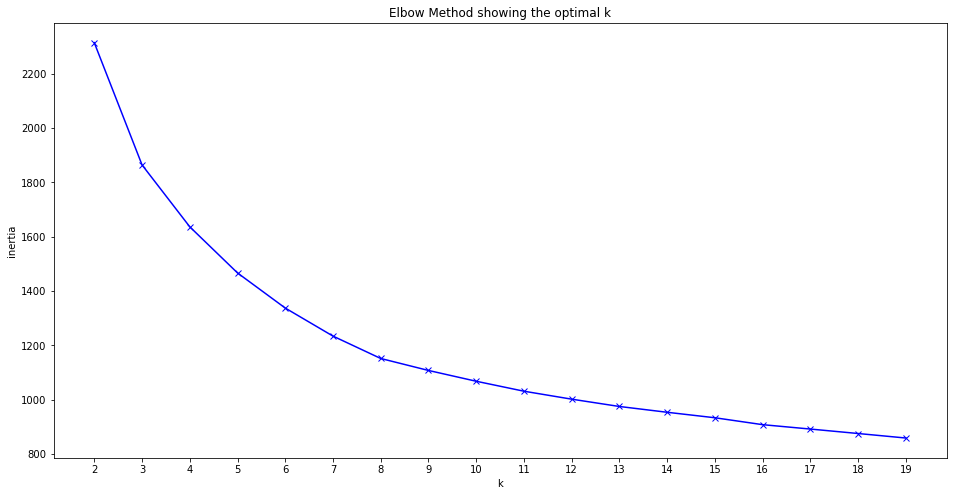

In [240]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(features_to_scale)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [246]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(features_to_scale)

KMeans(n_clusters=3, random_state=1234)

In [247]:
kmeans.inertia_ 

1864.779334053604

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

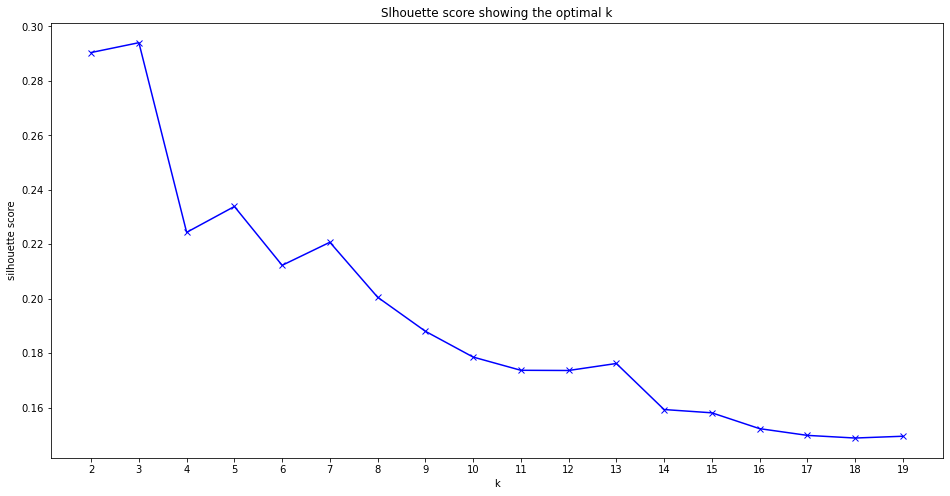

In [245]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(features_to_scale)
    silhouette.append(silhouette_score(features_to_scale, kmeans.predict(features_to_scale)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [248]:
song_list['song_clusters'] = clusters

In [249]:
song_list.head()

index       artist             songs                track_id  danceability  \
0      0  Nosaj Thing                2K  33xMbeHzmWd6Od0BmLZEUs         0.310   
1      1    The Doors   4 Billion Souls  3UnyplmZaq547hwsfOR5yy         0.419   
2      2    Radiohead  4 Minute Warning  1w8QCSDH4QobcQeT4uMKLm         0.354   
3      3        Vitas         7 Element  7J9mBHG4J2eIfDAv5BehKA         0.727   
4      4       R.E.M.          #9 Dream  1VZedwJj1gyi88WFRhfThb         0.571   

   energy    key  loudness  speechiness  duration_ms  instrumentalness  \
0   0.445  0.445   -13.355       0.0863       152560           0.06780   
1   0.565  0.565   -11.565       0.0347       197707           0.33700   
2   0.302  0.302   -13.078       0.0326       244285           0.07090   
3   0.785  0.785    -6.707       0.0603       249940           0.12600   
4   0.724  0.724    -5.967       0.0260       278320           0.00311   

   liveness  valence    tempo  time_signature  song_clusters  
0    0.1130    0.122   95.360               3              2  
1    0.1280    0.648  151.277               4              1  
2    0.1110    0.223  123.753               4              2  
3    0.3100    0.960  129.649               4              1  
4    0.0919    0.385  116.755               4              1

In [250]:
song_list.to_csv("spotify_list_clusters.csv")